In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming the file is named 'glass.csv' and is in the same directory.
df = pd.read_csv('glass.csv')

# Display the first few rows of the dataframe to check the data
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1.0


In [2]:
# Get a concise summary of the dataframe
print("\nDataset Information:")
df.info()

# Get descriptive statistics for numerical features
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values Check:")
print(df.isnull().sum())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB

Descriptive Statistics:
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000

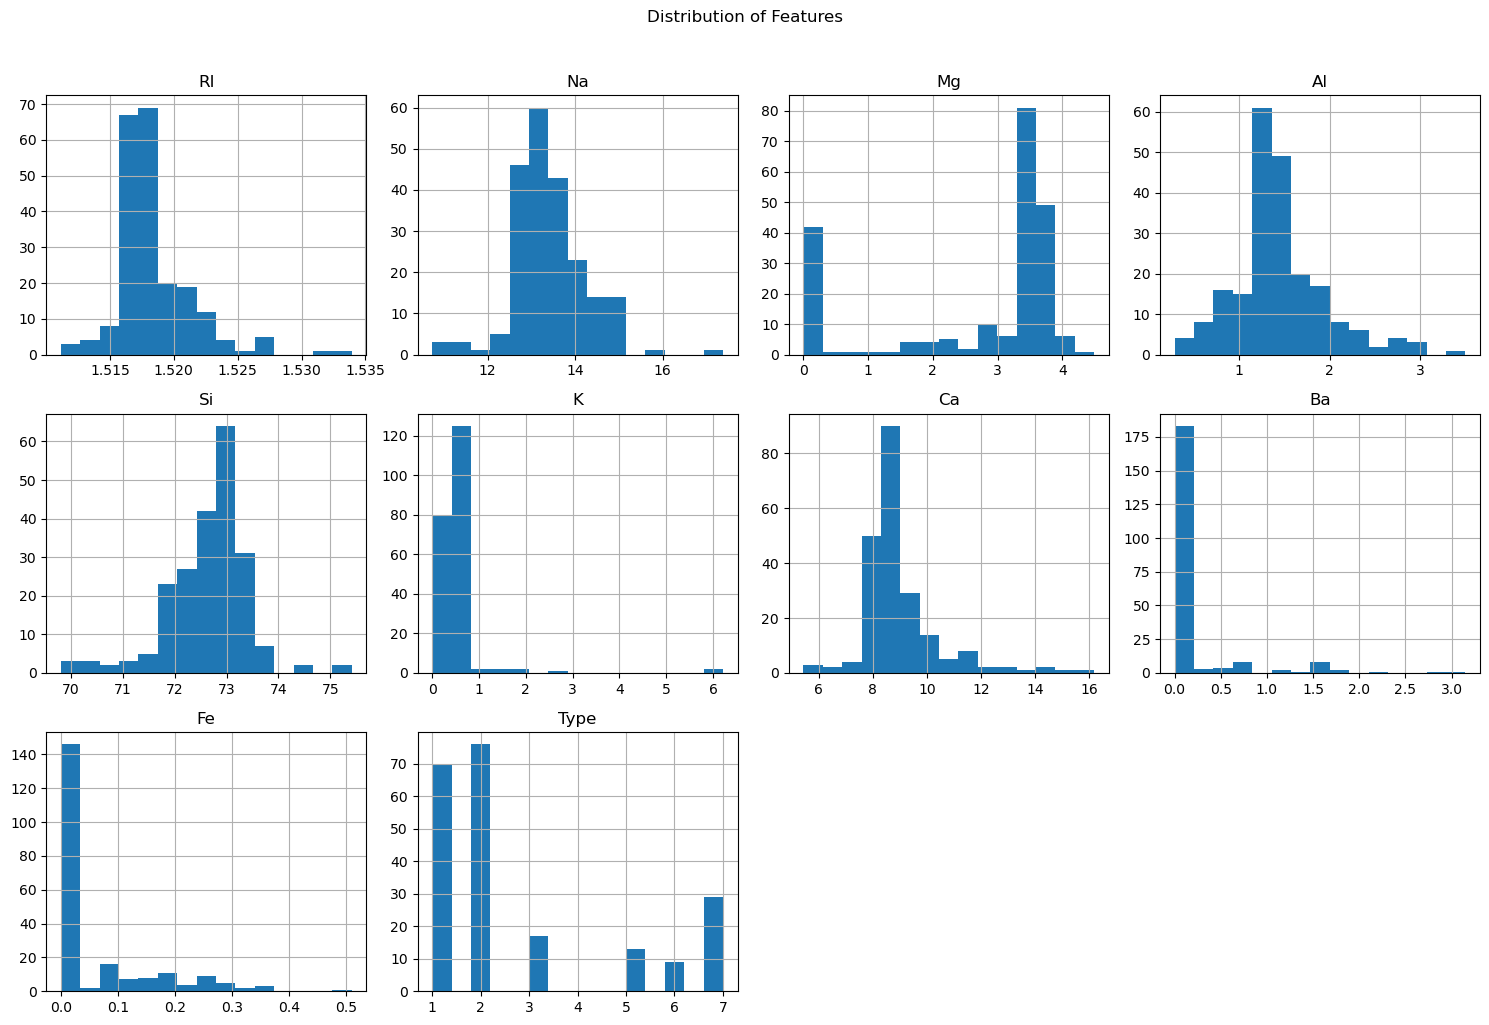

In [3]:
# Visualize the distribution of each feature
# This helps in identifying outliers and the general shape of the data.
df.hist(bins=15, figsize=(15, 10), layout=(3, 4))
plt.suptitle('Distribution of Features', y=1.02)
plt.tight_layout()
plt.show()

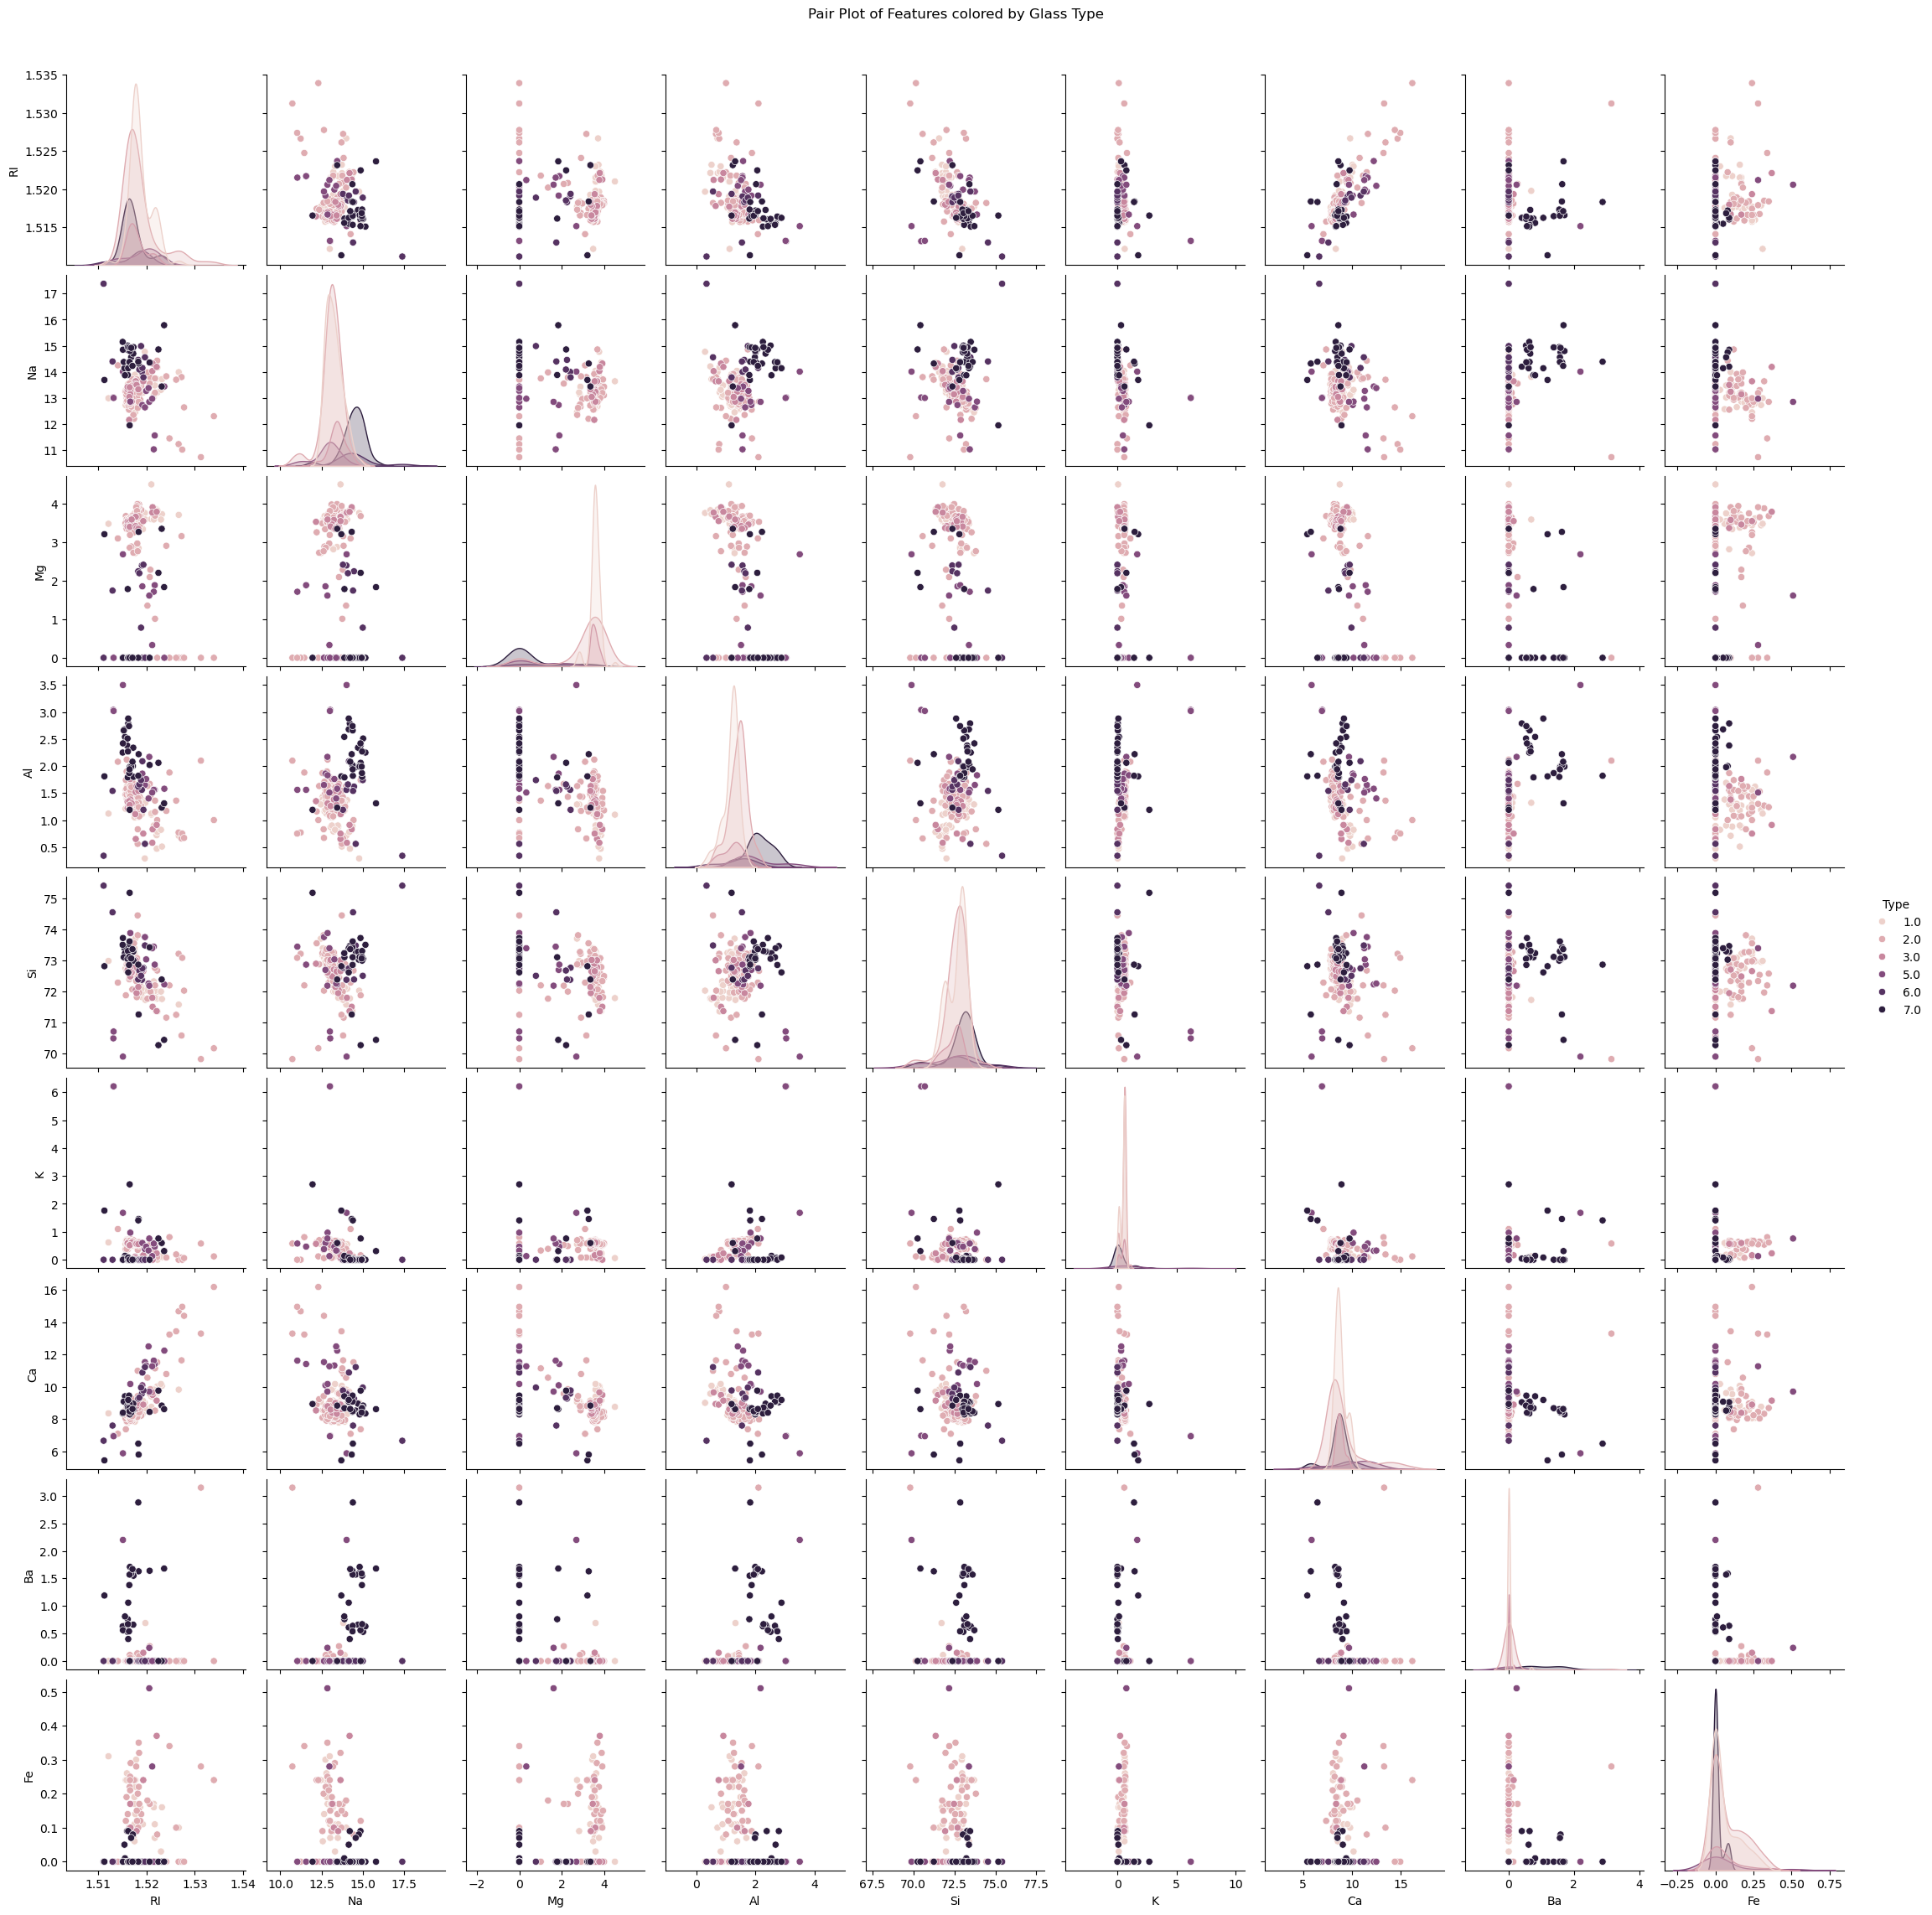

In [4]:
# Visualize the relationships between features (Pair Plot)
# A pair plot is great for visualizing correlations and patterns.
sns.pairplot(df, hue='Type')
plt.suptitle('Pair Plot of Features colored by Glass Type', y=1.02)
plt.show()


Glass Type Distribution:
Type
2.0    76
1.0    70
7.0    29
3.0    17
5.0    13
6.0     9
Name: count, dtype: int64


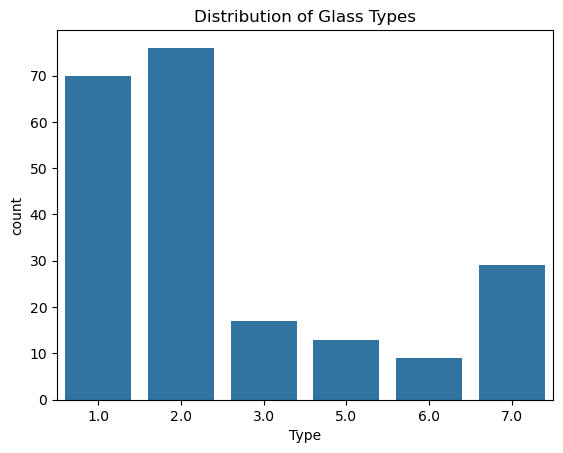

In [5]:
# Analyze the class distribution (imbalance)
# This is a crucial step as the data can be imbalanced, which we need to handle.
print("\nGlass Type Distribution:")
print(df['Type'].value_counts())
sns.countplot(x='Type', data=df)
plt.title('Distribution of Glass Types')
plt.show()

In [10]:
!pip install imblearn
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('Type', axis=1)
y = df['Type']

# --- Correcting the issue by dropping rows with NaN in the 'Type' column ---
# This is a crucial step to prevent the 'ValueError: Input y contains NaN.'
# We use .dropna() on y and then re-index X to match the cleaned y.
initial_shape = y.shape[0]
y.dropna(inplace=True)
X = X.loc[y.index]
final_shape = y.shape[0]

print(f"Removed {initial_shape - final_shape} rows with missing 'Type' values.")


Removed 785 rows with missing 'Type' values.



Resampled Glass Type Distribution:
Type
1.0    76
2.0    76
3.0    76
5.0    76
6.0    76
7.0    76
Name: count, dtype: int64


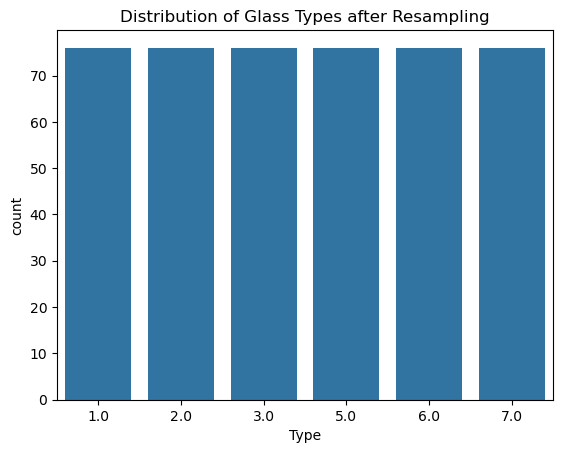

In [11]:
# Handle class imbalance using RandomOverSampler [cite: 8]
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print("\nResampled Glass Type Distribution:")
print(y_resampled.value_counts())
sns.countplot(x=y_resampled)
plt.title('Distribution of Glass Types after Resampling')
plt.show()


In [12]:
# Split the resampled data into training and testing sets [cite: 9]
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Apply Feature Scaling using StandardScaler [cite: 7]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nShape of training data:", X_train_scaled.shape)
print("Shape of testing data:", X_test_scaled.shape)



Shape of training data: (364, 9)
Shape of testing data: (92, 9)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Random Forest Classifier [cite: 9]
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model [cite: 10]
y_pred_rf = rf_classifier.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Accuracy: {accuracy_rf:.4f}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9565

Random Forest Classification Report:
              precision    recall  f1-score   support

         1.0       0.93      0.87      0.90        15
         2.0       1.00      0.87      0.93        15
         3.0       0.88      1.00      0.94        15
         5.0       1.00      1.00      1.00        16
         6.0       1.00      1.00      1.00        16
         7.0       0.94      1.00      0.97        15

    accuracy                           0.96        92
   macro avg       0.96      0.96      0.96        92
weighted avg       0.96      0.96      0.96        92



In [14]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# --- Bagging Classifier Implementation ---
bagging_classifier = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging_classifier.fit(X_train_scaled, y_train)
y_pred_bagging = bagging_classifier.predict(X_test_scaled)


In [15]:
# Evaluate Bagging
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("\n--- Bagging Classifier Results ---")
print(f"Bagging Accuracy: {accuracy_bagging:.4f}")
print("Bagging Classification Report:")
print(classification_report(y_test, y_pred_bagging))



--- Bagging Classifier Results ---
Bagging Accuracy: 0.9130
Bagging Classification Report:
              precision    recall  f1-score   support

         1.0       0.72      0.87      0.79        15
         2.0       1.00      0.60      0.75        15
         3.0       0.83      1.00      0.91        15
         5.0       1.00      1.00      1.00        16
         6.0       1.00      1.00      1.00        16
         7.0       1.00      1.00      1.00        15

    accuracy                           0.91        92
   macro avg       0.93      0.91      0.91        92
weighted avg       0.93      0.91      0.91        92



In [16]:
# --- AdaBoost Classifier (Boosting) Implementation ---
adaboost_classifier = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    random_state=42
)
adaboost_classifier.fit(X_train_scaled, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_test_scaled)


C:\Users\vishu_pdk4f5i\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [17]:
# Evaluate AdaBoost
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("\n--- AdaBoost Classifier Results ---")
print(f"AdaBoost Accuracy: {accuracy_adaboost:.4f}")
print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_adaboost))



--- AdaBoost Classifier Results ---
AdaBoost Accuracy: 0.5326
AdaBoost Classification Report:
              precision    recall  f1-score   support

         1.0       0.33      0.93      0.48        15
         2.0       0.00      0.00      0.00        15
         3.0       0.50      0.07      0.12        15
         5.0       0.73      1.00      0.84        16
         6.0       0.94      1.00      0.97        16
         7.0       1.00      0.13      0.24        15

    accuracy                           0.53        92
   macro avg       0.58      0.52      0.44        92
weighted avg       0.59      0.53      0.45        92



In [18]:
# --- Final Comparison ---
print("\n--- Summary of Model Accuracies ---")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Bagging Accuracy: {accuracy_bagging:.4f}")
print(f"AdaBoost Accuracy: {accuracy_adaboost:.4f}")


--- Summary of Model Accuracies ---
Random Forest Accuracy: 0.9565
Bagging Accuracy: 0.9130
AdaBoost Accuracy: 0.5326


In [ ]:
'''
Additional Notes:
1. Explain Bagging and Boosting methods. How is it different from each other.

Bagging and Boosting are both ensemble learning methods, which means they combine the predictions from multiple machine learning models 
(called "base learners") to create a single, more robust prediction. The key difference lies in how they build and combine these base learners.

Bagging (Bootstrap Aggregating)
How it works: Bagging trains multiple base learners, such as decision trees, in parallel on different random subsets of the training data. 
These subsets are created by bootstrapping, which involves sampling with replacement. Each base learner is trained independently of the others. 
The final prediction is made by averaging the predictions (for regression) or taking a majority vote (for classification) from all the base learners.

Primary goal: To reduce variance and prevent overfitting. By training on different data subsets, the individual models become less sensitive
to specific training data points, and their combined predictions are more stable. Random Forest is a prime example of a Bagging algorithm.


Boosting
How it works: Boosting trains a series of weak base learners sequentially. Each subsequent model is built to correct the errors made by the 
previous ones. The algorithm focuses on the data points that were misclassified by the previous models, giving them more weight in the next iteration. 
This iterative process gradually improves the overall model's performance.

Primary goal: To reduce bias and convert a series of weak learners into a strong learner.

Analogy: Consider a team of proofreaders editing a document. The first proofreader finds a few errors. The second proofreader then specifically
focuses on the sentences where the first one made mistakes. The third proofreader focuses on the remaining errors, and so on. Each new proofreader
learns from the mistakes of the previous one.

'''

In [ ]:
'''
2. Explain how to handle imbalance in the data.


Data imbalance is a common problem in classification where the number of samples in one class (the "majority class") significantly outnumbers
the samples in other classes (the "minority classes"). This can cause a model to become biased towards the majority class, leading to poor
performance in classifying the minority classes.

Here are the most common strategies to handle imbalanced data, as demonstrated in the code provided:

1)Resampling Techniques: This is the most direct way to change the class distribution.

Oversampling: This technique, which was used in the provided code, involves increasing the number of samples in the minority class.
Methods like Random Over-Sampling duplicate minority class samples, while more advanced methods like SMOTE (Synthetic Minority Over-sampling Technique)
generate new, synthetic samples based on existing ones. This helps the model learn the patterns of the minority class more effectively.

Undersampling: This involves reducing the number of samples in the majority class. This can be done randomly or by using more sophisticated methods
like Tomek links or NearMiss to strategically remove majority samples that are close to the decision boundary. Undersampling can be effective but
risks losing important information.

1)Using Different Evaluation Metrics: Accuracy can be misleading with imbalanced data. For example, if 95% of your data is from one class,
a model that simply predicts the majority class for all samples will achieve 95% accuracy, but it would be useless. It's better to use metrics
that focus on minority class performance, such as:

Precision: The proportion of positive identifications that were actually correct.

Recall (Sensitivity): The proportion of actual positives that were identified correctly.

F1-Score: The harmonic mean of precision and recall, providing a balanced measure.

3)Using Algorithmic Approaches:

Cost-Sensitive Learning: Adjusts the model's cost function to penalize misclassifying minority class samples more heavily than misclassifying
majority class samples.

Ensemble Methods: Many ensemble methods, particularly tree-based ones like Random Forest and Gradient Boosting, are naturally more robust to
imbalanced data. In the case of Random Forest, the bootstrapping process ensures that each tree is trained on a slightly different subset,
which can include more minority class samples.

'''